# <center>Assignment 6</center>
<center>Jingxue Yan, Xuchen Zhu</center>
<center>December 18 2025</center>

## Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import pandas as pd

# Load the data
def load_genome_data(filepath):
    individuals = []
    sexes = []
    populations = []
    genetic_data = []
    
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            individuals.append(parts[0])
            sexes.append(parts[1])
            populations.append(parts[2])
            genetic_data.append(parts[3:])  
    
    return individuals, sexes, populations, genetic_data

def load_population_decoding(filepath):
    decoding = {}
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                decoding[parts[0]] = ' '.join(parts[1:])
    return decoding

# Convert genetic data to binary matrix
def create_binary_matrix(genetic_data):
    genetic_array = np.array(genetic_data)
    n_individuals, n_positions = genetic_array.shape
    X = np.zeros((n_individuals, n_positions), dtype=int)
    
    for j in range(n_positions):
        column = genetic_array[:, j]
        unique_bases, counts = np.unique(column, return_counts=True)
        mode_index = np.argmax(counts)
        mode_value = unique_bases[mode_index]
        
        # Set to 1 if different from mode, 0 if same as mode
        X[:, j] = (column != mode_value).astype(int)
    
    return X

# Load data (update these paths to your actual file locations)
data_filepath = 'p4dataset2023.txt'
decoding_filepath = 'p4dataset2023_decoding.txt'

try:
    individuals, sexes, populations, genetic_data = load_genome_data(data_filepath)
    pop_decoding = load_population_decoding(decoding_filepath)
    print(f"Number of nucleobase positions: {len(genetic_data[0])}")
    
    n_positions = len(genetic_data[0])
    print(f"The principal components will be {n_positions}-dimensional vectors.")
    
    print("\nCreating binary matrix X...")
    X = create_binary_matrix(genetic_data)
    print(f"Binary matrix shape: {X.shape}")
    
    # Run PCA
    print("\nRunning PCA...")
    n_components = 3  # We need at least 3 components for this exercise
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    print(f"PCA components shape: {pca.components_.shape}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")
    
    # Get unique populations and assign colors
    unique_pops = sorted(list(set(populations)))
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pops)))
    pop_color_map = dict(zip(unique_pops, colors))
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for pop in unique_pops:
        mask = np.array(populations) == pop
        pop_name = pop_decoding.get(pop, pop)
        ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                  c=[pop_color_map[pop]], 
                  label=pop_name, 
                  alpha=0.6, 
                  s=30)
    
    ax.set_xlabel('First Principal Component (PC1)', fontsize=12)
    ax.set_ylabel('Second Principal Component (PC2)', fontsize=12)
    ax.set_title('PCA of Genome Data: First Two Principal Components', fontsize=14)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('Q2_PC1_PC2_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Plot saved as 'Q2_PC1_PC2_scatter.png'")
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for pop in unique_pops:
        mask = np.array(populations) == pop
        pop_name = pop_decoding.get(pop, pop)
        ax.scatter(X_pca[mask, 0], X_pca[mask, 2], 
                  c=[pop_color_map[pop]], 
                  label=pop_name, 
                  alpha=0.6, 
                  s=30)
    
    ax.set_xlabel('First Principal Component (PC1)', fontsize=12)
    ax.set_ylabel('Third Principal Component (PC3)', fontsize=12)
    ax.set_title('PCA of Genome Data: PC1 vs PC3', fontsize=14)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('Q4_PC1_PC3_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()
    # By sex
    fig, ax = plt.subplots(figsize=(10, 8))
    for sex in ['M', 'F']:
        mask = np.array(sexes) == sex
        ax.scatter(X_pca[mask, 0], X_pca[mask, 2], 
                  label=f'Sex: {sex}', 
                  alpha=0.6, 
                  s=30)
    ax.set_xlabel('First Principal Component (PC1)', fontsize=12)
    ax.set_ylabel('Third Principal Component (PC3)', fontsize=12)
    ax.set_title('PCA: PC1 vs PC3 (Colored by Sex)', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('Q4_PC1_PC3_by_sex.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Sex-based plot saved as 'Q4_PC1_PC3_by_sex.png'")

    print("\n" + "="*60)
    print("Q6: Third Principal Component by Nucleobase Index")
    print("="*60)
    
    pc3_values = pca.components_[2, :]  # Third principal component
    indices = np.arange(1, len(pc3_values) + 1)
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(indices, np.abs(pc3_values), linewidth=0.5)
    ax.set_xlabel('Nucleobase Index', fontsize=12)
    ax.set_ylabel('|PC3 Component Value|', fontsize=12)
    ax.set_title('Absolute Values of Third Principal Component', fontsize=14)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('Q6_PC3_values.png', dpi=300, bbox_inches='tight')
    plt.show()


except FileNotFoundError as e:
    print(f"\nError: Could not find data file.")
    print(f"Please make sure the following files are in the same directory:")
    print(f"  - p4dataset2023.txt")
    print(f"  - p4dataset2023decoding.txt")
    print(f"\nError details: {e}")
except Exception as e:
    print(f"\nAn error occurred: {e}")
    import traceback
    traceback.print_exc()

## Exercise 2

In [61]:
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_moons

In [62]:
# --- Data Generation ---
np.random.seed(42)
n_samples = 2000
means = np.array([[-1, -1], [1, 1]])
covariances = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]])]
proportions = [0.5, 0.5]
n_clusters = len(means)

# Generate data
data = []
labels = []
for i, (mean, cov, prop) in enumerate(zip(means, covariances, proportions)):
    n = int(prop * n_samples)
    cluster_data = np.random.multivariate_normal(mean, cov, n)
    data.append(cluster_data)
    labels += [i] * n
data = np.vstack(data)
labels = np.array(labels)
data.shape
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# --- Plotting Utility ---
def plot_clusters(data, labels, centroids=None, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    if labels.ndim > 1:
        c=  labels[:,0]
    else:
        c = labels
    ax.scatter(data[:, 0], data[:, 1], c=c, cmap="coolwarm", s=10)
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c="black", marker="X")
    if title is not None:
        ax.set_title(title)
    #plt.savefig("A6-E2-Q1.pdf", format="pdf", bbox_inches="tight")

def plot_gaussian_ellipses(means, covariances, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for mean, cov in zip(means, covariances):
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigenvalues)
        ellipse = Ellipse(
            xy=mean,
            width=width,
            height=height,
            angle=angle,
            edgecolor="black",
            fc="None",
            lw=2,
        )
        ax.add_patch(ellipse)
        

In [74]:
# --- KMeans Class ---
class KMeansCustom:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def initialize_centroids(self, data):
        n_samples = data.shape[0]
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = data[indices]

    def assign_clusters(self, data):
        """
        Assign each point to the nearest centroid.
        """
        # TODO:  # Fill in this method
        ## data is 2000 * 2
        ## calcuate the distance between data point and centroids
        
        distances = np.sum(
            (data[:, None, :] - self.centroids[None, :, :]) ** 2,
            axis=2
        )

        # Assign closest centroid
        labels = np.argmin(distances, axis=1)

        return labels

    def update_centroids(self, data, labels):
        """
        Update centroids as the mean of all points assigned to each cluster.
        """
        # TODO:  # Fill in this method
        #new_centroids = np.random.randn(self.n_clusters, data.shape[1])
        K = self.n_clusters
        D = data.shape[1]

        new_centroids = np.zeros((K, D))

        for k in range(K):
            cluster_data = data[labels == k]

            # Handle empty cluster
            if len(cluster_data) == 0:
                new_centroids[k] = self.centroids[k]
            else:
                new_centroids[k] = np.mean(cluster_data, axis=0)

        return new_centroids

    def fit(self, data, iterations_to_store=[0, 1, 2, 5, 10, 20]):
        self.initialize_centroids(data)
        self.stored_params = {}
        for i in range(max(iterations_to_store) + 1):
            labels = self.assign_clusters(data)
            new_centroids = self.update_centroids(data, labels)
            if i in iterations_to_store:
                self.stored_params[i] = {
                    "centroids": self.centroids.copy(),
                    "labels": labels.copy(),
                }
            self.centroids = new_centroids

    def predict(self, data):
        return self.assign_clusters(data)

In [75]:
np.ones(2) /2

array([0.5, 0.5])

In [76]:
# --- EM Class ---
class EMGMM:
    def __init__(self, n_components):
        self.n_components = n_components

    def initialize_params(self, data):
        n_samples, n_features = data.shape # 2000, 2
        self.means = data[np.random.choice(n_samples, self.n_components, replace=False)] # 2000, 2
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        self.weights = np.ones(self.n_components) / self.n_components # prior belief

    def e_step(self, data):
        """
        Compute responsibilities (soft assignments) for each cluster.
        """
        N = data.shape[0]
        K = self.n_components

        responsibilities = np.zeros((N, K))

        # Compute unnormalized posteriors
        for k in range(K):
            responsibilities[:, k] = (
                self.weights[k]
                * self.multivariate_gaussian(
                    data,
                    self.means[k],
                    self.covariances[k]
                )
            )

        # Normalize (Bayes rule)
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        return responsibilities
    def m_step(self, data, responsibilities):
        """
        Update means, covariances, and weights based on responsibilities.
        """
        N, D = data.shape
        K = self.n_components

        # Effective number of points per cluster
        Nk = np.sum(responsibilities, axis=0)  # shape (K,)

        # Update means
        self.means = (responsibilities.T @ data) / Nk[:, None]

        # Update covariances
        for k in range(K):
            diff = data - self.means[k]
            self.covariances[k] = (
                responsibilities[:, k][:, None] * diff
            ).T @ diff / Nk[k]

            # Numerical stability
            self.covariances[k] += 1e-6 * np.eye(D)

        # Update mixing weights
        self.weights = Nk / N

    def multivariate_gaussian(self, data, mean, cov):
        """
        Compute the multivariate Gaussian probability density.
        """
        N, D = data.shape

        diff = data - mean                 # (N, D)
        inv_cov = np.linalg.inv(cov)       # (D, D)
        det_cov = np.linalg.det(cov)

        norm_const = 1.0 / np.sqrt((2 * np.pi) ** D * det_cov)

        exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
        return norm_const * np.exp(exponent)


    def fit(self, data, iterations_to_store=[0, 1, 2, 5, 10, 20]):
        self.initialize_params(data)
        self.stored_params = {}
        for i in range(max(iterations_to_store) + 1):
            responsibilities = self.e_step(data)
            self.m_step(data, responsibilities)
            if i in iterations_to_store:
                self.stored_params[i] = {
                    "means": self.means.copy(),
                    "covariances": self.covariances.copy(),
                    "responsibilities": responsibilities.copy(),
                }

    def predict(self, data):
        responsibilities = self.e_step(data)
        return np.argmax(responsibilities, axis=1)

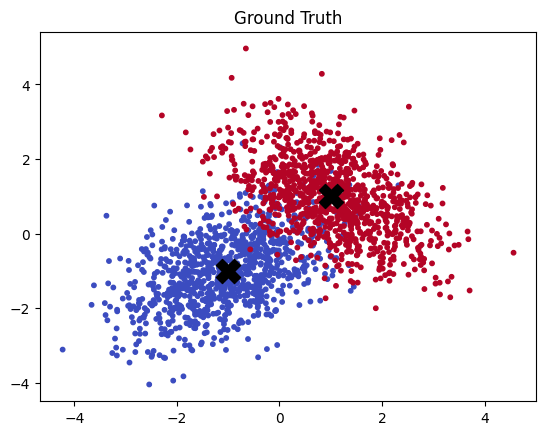

In [77]:
# --- Example Usage ---
# Plot initial data
plot_clusters(data, labels, means, title="Ground Truth")

In [78]:
# Run k-means
kmeans = KMeansCustom(n_clusters=n_clusters)
kmeans.fit(data)
kmeans_labels = kmeans.predict(data)

# Metrics
ari_kmeans = adjusted_rand_score(labels, kmeans_labels)
print(f"k-means ARI: {ari_kmeans:.3f}")

k-means ARI: 0.704


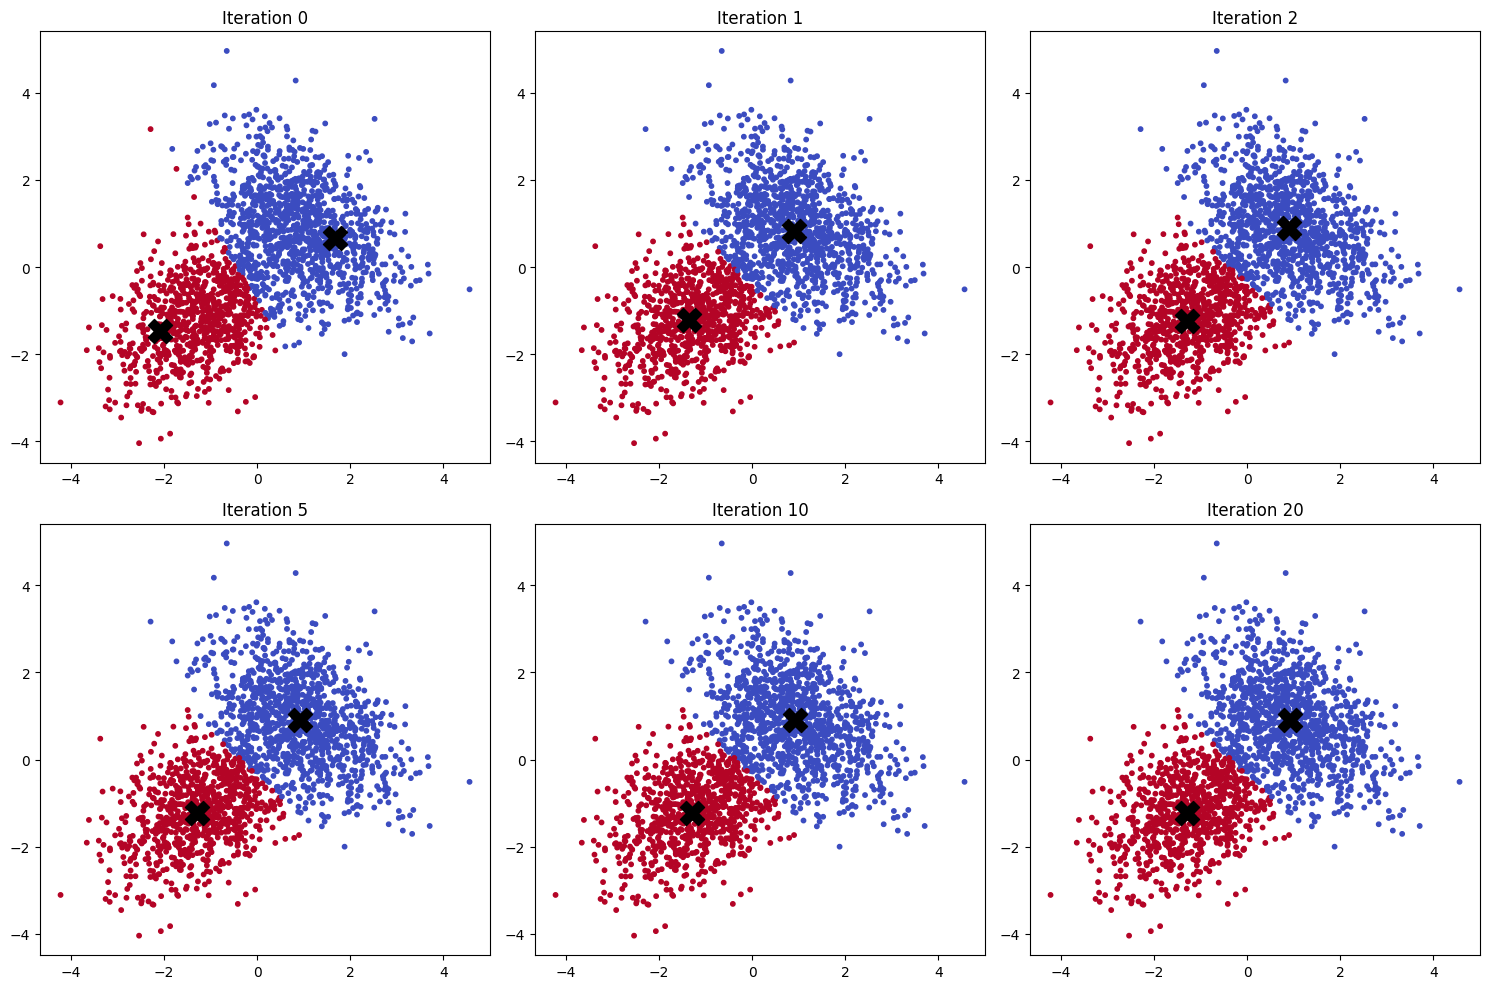

In [79]:
iterations = [0, 1, 2, 5, 10, 20]
# Plot assignments at specified iterations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, i in zip(axes.flatten(), iterations):
    responsibilities = kmeans.stored_params[i]["labels"]
    em_centroids = kmeans.stored_params[i]["centroids"]
    plot_clusters(data, responsibilities, em_centroids, ax=ax)
    ax.set_title(f"Iteration {i}")
plt.tight_layout()
plt.savefig("A6-E2-Q2.pdf", format="pdf", bbox_inches="tight")

In [70]:
# Run EM
em = EMGMM(n_components=n_clusters)
em.fit(data)
em_labels = em.predict(data)

# Metrics
ari_em = adjusted_rand_score(labels, em_labels)
print(f"EM ARI: {ari_em:.3f}")

EM ARI: 0.771


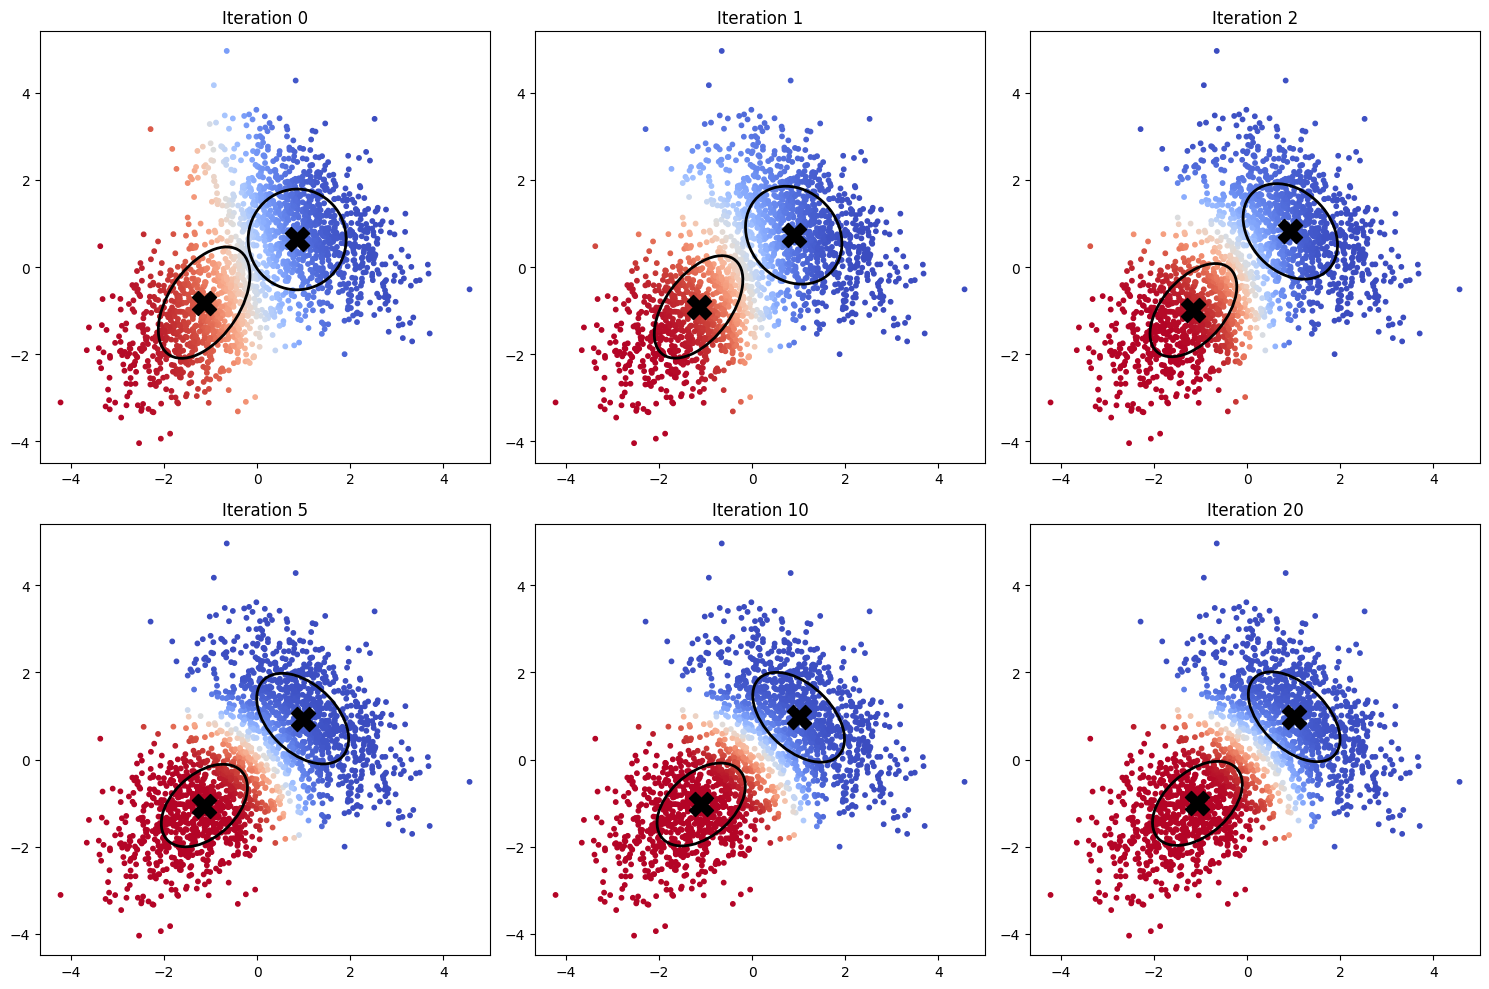

In [72]:
iterations = [0, 1, 2, 5, 10, 20]
# Plot assignments at specified iterations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, i in zip(axes.flatten(), iterations):
    responsibilities = em.stored_params[i]["responsibilities"]
    cov = em.stored_params[i]["covariances"]
    em_centroids = em.stored_params[i]["means"]
    plot_clusters(data, responsibilities, em_centroids, ax=ax)
    plot_gaussian_ellipses(em_centroids, cov, ax=ax)
    ax.set_title(f"Iteration {i}")
plt.tight_layout()
plt.savefig("A6-E2-Q3.pdf", format="pdf", bbox_inches="tight")

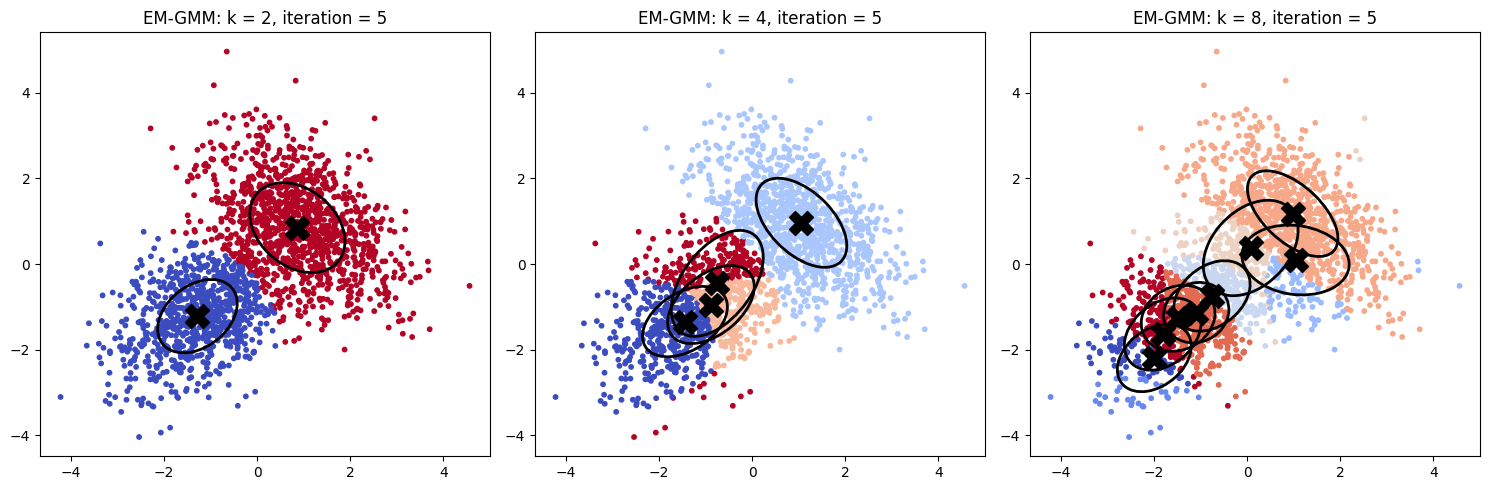

In [82]:
k_values = [2, 4, 8]
iteration = 20

fig, axes = plt.subplots(1, len(k_values), figsize=(5 * len(k_values), 5))

for ax, k in zip(axes, k_values):

    # ----- Run EM-GMM -----
    em = EMGMM(n_components=k)
    em.fit(data)

    # Safeguard: ensure iteration exists
    it = min(iteration, len(em.stored_params) - 1)

    responsibilities = em.stored_params[it]["responsibilities"]
    means = em.stored_params[it]["means"]
    covariances = em.stored_params[it]["covariances"]

    # Hard labels for plotting
    labels = np.argmax(responsibilities, axis=1)

    # ----- Plot -----
    plot_clusters(data, labels, means, ax=ax)
    plot_gaussian_ellipses(means, covariances, ax=ax)

    ax.set_title(f"EM-GMM: k = {k}, iteration = {it}")

plt.tight_layout()
plt.savefig("A6-E2-Q5-2.pdf", format="pdf", bbox_inches="tight")
plt.show()


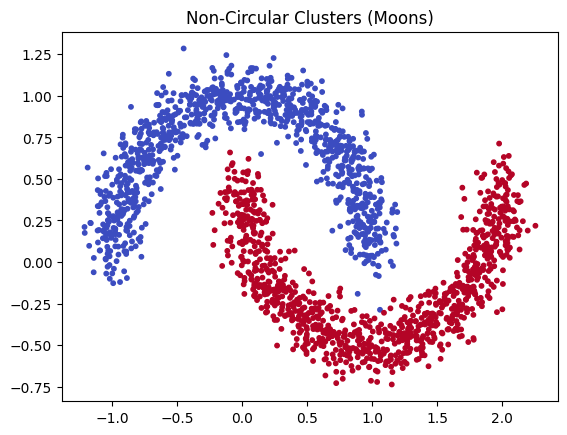

In [84]:
# --- Q6: Non-Circular Clusters (make_moons) ---
def generate_moons_data():
    data, labels = make_moons(n_samples=2000, noise=0.1, random_state=42)
    return data, labels

moons_data, moons_labels = generate_moons_data()
plot_clusters(moons_data, moons_labels, title="Non-Circular Clusters (Moons)")

# TODO: # Fill in the code to run k-means and EM on the moons dataset for k = 2 and 4 clusters and plot the results


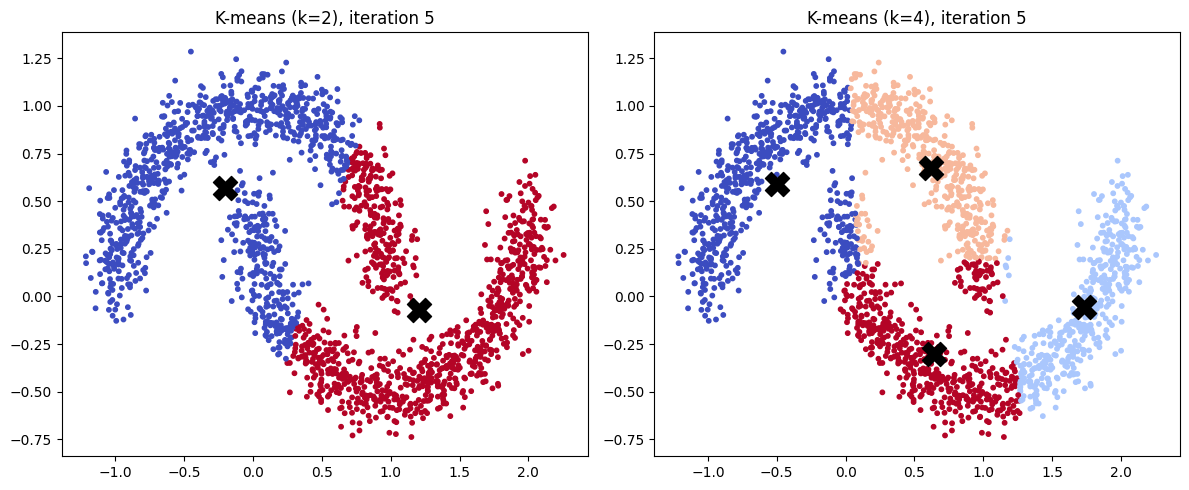

In [88]:
k_values = [2, 4]
iteration = 20

fig, axes = plt.subplots(1, len(k_values), figsize=(6 * len(k_values), 5))

for ax, k in zip(axes, k_values):
    kmeans = KMeansCustom(n_clusters=k)
    kmeans.fit(moons_data)

    # Safeguard: ensure iteration exists
    it = min(iteration, len(kmeans.stored_params) - 1)

    labels = kmeans.stored_params[it]["labels"]
    centroids = kmeans.stored_params[it]["centroids"]

    plot_clusters(moons_data, labels, centroids, ax=ax)
    ax.set_title(f"K-means (k={k}), iteration {it}")

plt.tight_layout()
plt.savefig("A6-E2-Q6-1.pdf", format="pdf", bbox_inches="tight")
plt.show()


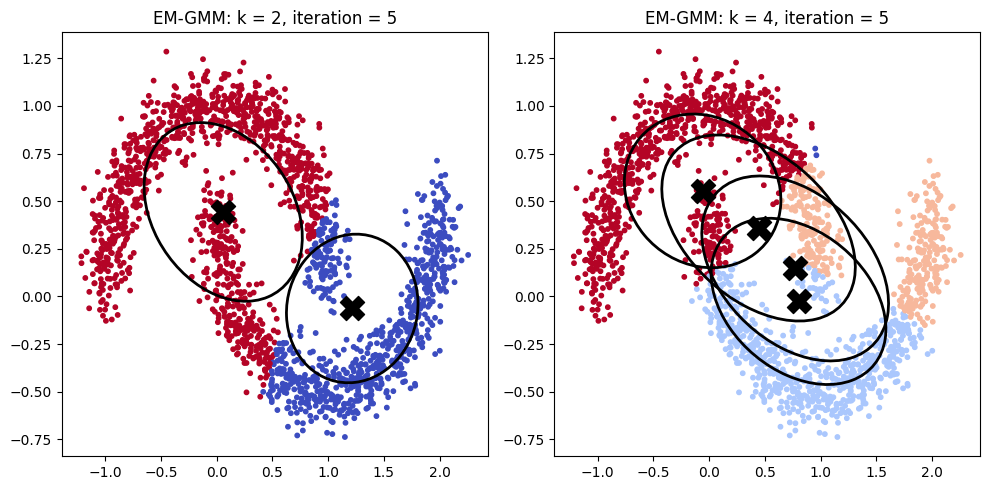

In [91]:
k_values = [2, 4]
iteration = 20

fig, axes = plt.subplots(1, len(k_values), figsize=(5 * len(k_values), 5))

for ax, k in zip(axes, k_values):

    # ----- Run EM-GMM -----
    em = EMGMM(n_components=k)
    em.fit(moons_data)

    # Safeguard: ensure iteration exists
    it = min(iteration, len(em.stored_params) - 1)

    responsibilities = em.stored_params[it]["responsibilities"]
    means = em.stored_params[it]["means"]
    covariances = em.stored_params[it]["covariances"]

    # Hard labels for visualization
    labels = np.argmax(responsibilities, axis=1)

    # ----- Plot -----
    plot_clusters(moons_data, labels, means, ax=ax)
    plot_gaussian_ellipses(means, covariances, ax=ax)

    ax.set_title(f"EM-GMM: k = {k}, iteration = {it}")

plt.tight_layout()
plt.savefig("A6-E2-Q6-2.pdf", format="pdf", bbox_inches="tight")
plt.show()


## Problem 3

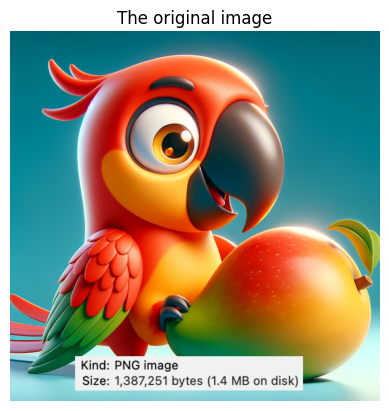

In [109]:
import matplotlib . pyplot as plt
from skimage import io

image_path = "Macaw.webp"
image = io.imread(image_path)
plt.imshow(image)
plt.title("The original image")
plt.axis("off")
#plt.savefig("A6-E3-Q1.pdf", format="pdf", bbox_inches="tight")
plt.show()
H, W, C = image.shape

In [110]:
image.shape

(1024, 1024, 3)

In [111]:
pixels = image.reshape(-1, 3)

In [112]:
print(f"pixel shape {pixels.shape}")

pixel shape (1048576, 3)


In [121]:
from sklearn.cluster import KMeans
k_values = [2,4,8,16,64]
images_seg = []
for k_value in k_values:
    
    kmeans = KMeans(n_clusters=k_value, random_state=0)
    kmeans.fit(pixels)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    segmented_pixels = centroids[labels]
    #print(segmented_pixels.shape)
    segmented_image = segmented_pixels.reshape(H, W, 3).astype(np.uint8)
    images_seg.append(segmented_image)



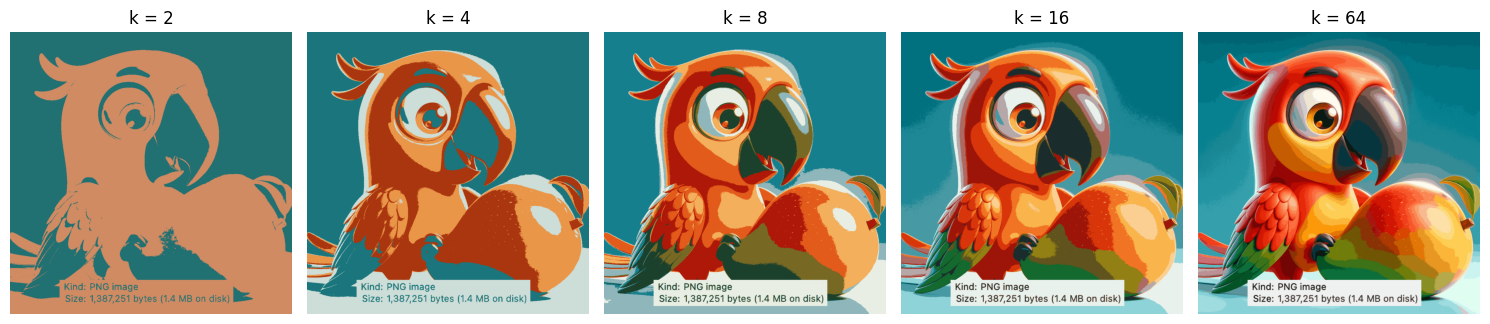

In [123]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, k_value in enumerate(k_values):
    axes[i].imshow(images_seg[i])
    axes[i].set_title(f"k = {k_value}")
    axes[i].imshow(images_seg[i])
    axes[i].axis("off")



plt.tight_layout()
plt.savefig("A6-E3-Q3.pdf", format="pdf", bbox_inches="tight")
plt.show()